# Looking at the impact of folding on fingerprint similarity


In [1]:
from rdkit import Chem, DataStructs
from rdkit.Chem import rdMolDescriptors
import gzip
from collections import defaultdict
import numpy as np
%pylab inline
from rdkit import rdBase
print(rdBase.rdkitVersion)
import time
print(time.asctime())


Populating the interactive namespace from numpy and matplotlib
2016.09.1.dev1
Thu Jun 16 06:16:42 2016


Start by reading in our set of reasonably similar molecules and generating Morgan2 fingerprints with a number of different lengths:

In [2]:
rows=[]
for row in gzip.open('../data/chembl21_25K.mfp1.pairs.txt.gz').readlines():
    row = row.split()
    row[1] = Chem.MolFromSmiles(row[1])
    row[3] = Chem.MolFromSmiles(row[3])
    rows.append(row)

In [3]:
sims = defaultdict(list)
for i,row in enumerate(rows):
    m1 = row[1]
    m2 = row[3]
    fp1 = rdMolDescriptors.GetMorganFingerprint(m1,2)
    fp2 = rdMolDescriptors.GetMorganFingerprint(m2,2)
    sims[-1].append(DataStructs.TanimotoSimilarity(fp1,fp2))
    
    for bitsize in (64, 128, 256, 512,1024,2048,4096):
        fp1 = rdMolDescriptors.GetMorganFingerprintAsBitVect(m1,2,nBits=bitsize)
        fp2 = rdMolDescriptors.GetMorganFingerprintAsBitVect(m2,2,nBits=bitsize)
        sims[bitsize].append(DataStructs.TanimotoSimilarity(fp1,fp2))
    if not (i+1)%5000: print("Done:",i+1)

Done: 5000
Done: 10000
Done: 15000
Done: 20000
Done: 25000


Now let's look at some of the differences

fraction >0:  0.1536
fraction >0.005:  0.11576
fraction >0.010:  0.03768
fraction >0.020:  0.00292
fraction >0.030:  0.00012


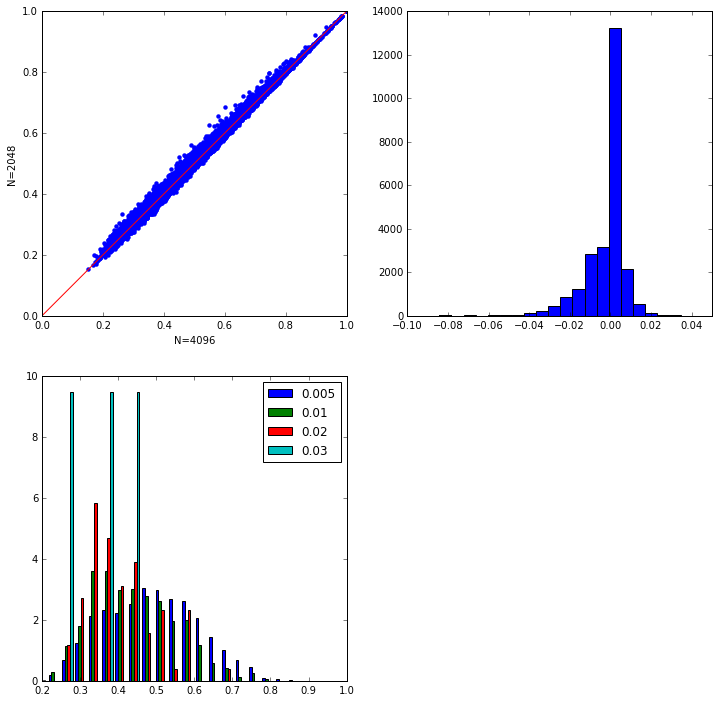

In [24]:
figsize(12,12)
subplot(2,2,1)
scatter(sims[4096],sims[2048],lw=0)
_=plot([0,1],[0,1],color='r')
_=xlabel('N=4096')
_=ylabel('N=2048')
_=xlim((0,1))
_=ylim((0,1))

subplot(2,2,2)
diffs=np.array(sims[4096])-np.array(sims[2048])
_=hist(diffs,bins=20)
_=xlim((-.1,.05))

print("fraction >0: ",sum(diffs>0)/len(diffs))
subplot(2,2,3)
tsims = []
bins = (0.005,0.01,0.02,0.03,)
for thresh in bins:
    tsims.append([sims[4096][x] for x in range(len(diffs)) if diffs[x]>thresh])
    print("fraction >%.3f: "%thresh,sum(diffs>thresh)/len(diffs))
    
_=hist(tsims,bins=20,normed=1,label=[str(x) for x in bins])
_=legend()
_=xlim((0.2,1.0))

fraction >0:  0.14968
fraction >0.005:  0.10464
fraction >0.010:  0.04072
fraction >0.020:  0.00376
fraction >0.030:  0.0006


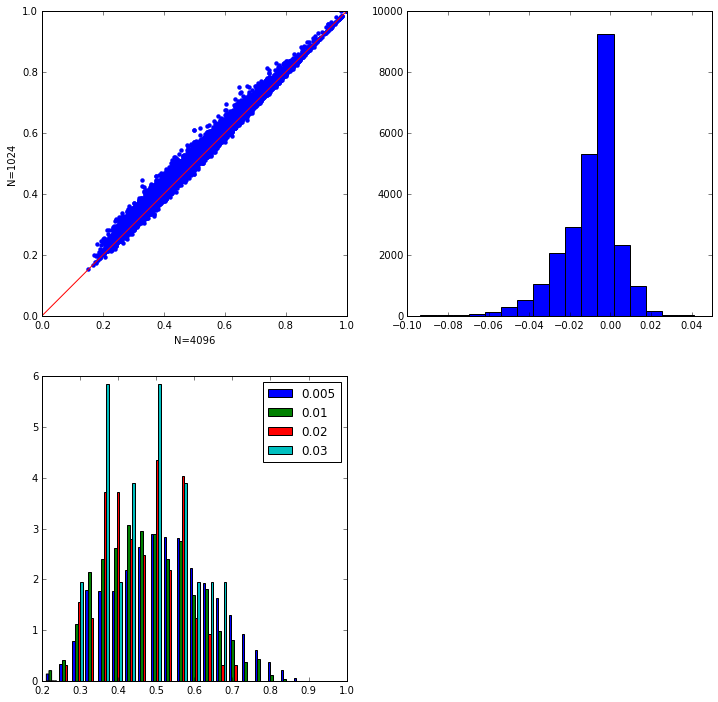

In [26]:
figsize(12,12)
subplot(2,2,1)
scatter(sims[4096],sims[1024],lw=0)
_=plot([0,1],[0,1],color='r')
_=xlabel('N=4096')
_=ylabel('N=1024')
_=xlim((0,1))
_=ylim((0,1))

subplot(2,2,2)
diffs=np.array(sims[4096])-np.array(sims[1024])
_=hist(diffs,bins=20)
_=xlim((-.1,.05))

print("fraction >0: ",sum(diffs>0)/len(diffs))
subplot(2,2,3)
tsims = []
bins = (0.005,0.01,0.02,0.03,)
for thresh in bins:
    tsims.append([sims[4096][x] for x in range(len(diffs)) if diffs[x]>thresh])
    print("fraction >%.3f: "%thresh,sum(diffs>thresh)/len(diffs))
    
_=hist(tsims,bins=20,normed=1,label=[str(x) for x in bins])
_=legend()
_=xlim((0.2,1.0))

fraction >0:  0.11412
fraction >0.005:  0.07492
fraction >0.010:  0.037
fraction >0.020:  0.00668
fraction >0.030:  0.00068


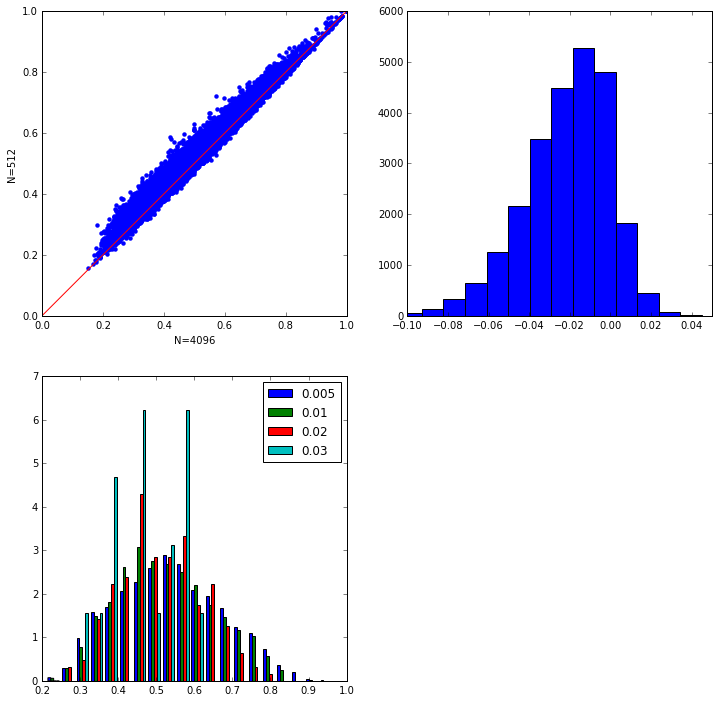

In [27]:
figsize(12,12)
subplot(2,2,1)
scatter(sims[4096],sims[512],lw=0)
_=plot([0,1],[0,1],color='r')
_=xlabel('N=4096')
_=ylabel('N=512')
_=xlim((0,1))
_=ylim((0,1))

subplot(2,2,2)
diffs=np.array(sims[4096])-np.array(sims[512])
_=hist(diffs,bins=20)
_=xlim((-.1,.05))

print("fraction >0: ",sum(diffs>0)/len(diffs))
subplot(2,2,3)
tsims = []
bins = (0.005,0.01,0.02,0.03,)
for thresh in bins:
    tsims.append([sims[4096][x] for x in range(len(diffs)) if diffs[x]>thresh])
    print("fraction >%.3f: "%thresh,sum(diffs>thresh)/len(diffs))
    
_=hist(tsims,bins=20,normed=1,label=[str(x) for x in bins])
_=legend()
_=xlim((0.2,1.0))

fraction >0:  0.05596
fraction >0.005:  0.03764
fraction >0.010:  0.02324
fraction >0.020:  0.00696
fraction >0.030:  0.00152


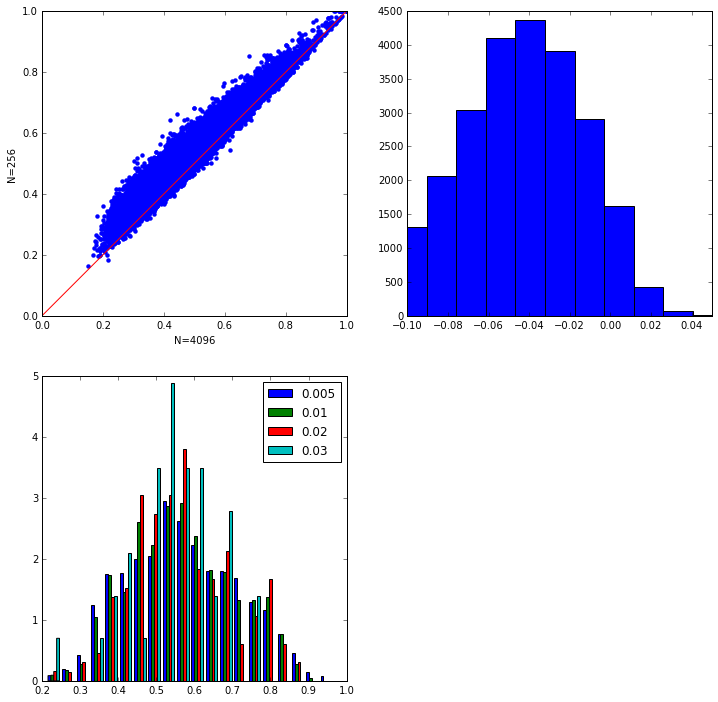

In [28]:
figsize(12,12)
subplot(2,2,1)
scatter(sims[4096],sims[256],lw=0)
_=plot([0,1],[0,1],color='r')
_=xlabel('N=4096')
_=ylabel('N=256')
_=xlim((0,1))
_=ylim((0,1))

subplot(2,2,2)
diffs=np.array(sims[4096])-np.array(sims[256])
_=hist(diffs,bins=20)
_=xlim((-.1,.05))

print("fraction >0: ",sum(diffs>0)/len(diffs))
subplot(2,2,3)
tsims = []
bins = (0.005,0.01,0.02,0.03,)
for thresh in bins:
    tsims.append([sims[4096][x] for x in range(len(diffs)) if diffs[x]>thresh])
    print("fraction >%.3f: "%thresh,sum(diffs>thresh)/len(diffs))
    
_=hist(tsims,bins=20,normed=1,label=[str(x) for x in bins])
_=legend()
_=xlim((0.2,1.0))

fraction >0:  0.02012
fraction >0.005:  0.01464
fraction >0.010:  0.01064
fraction >0.020:  0.00424
fraction >0.030:  0.00124


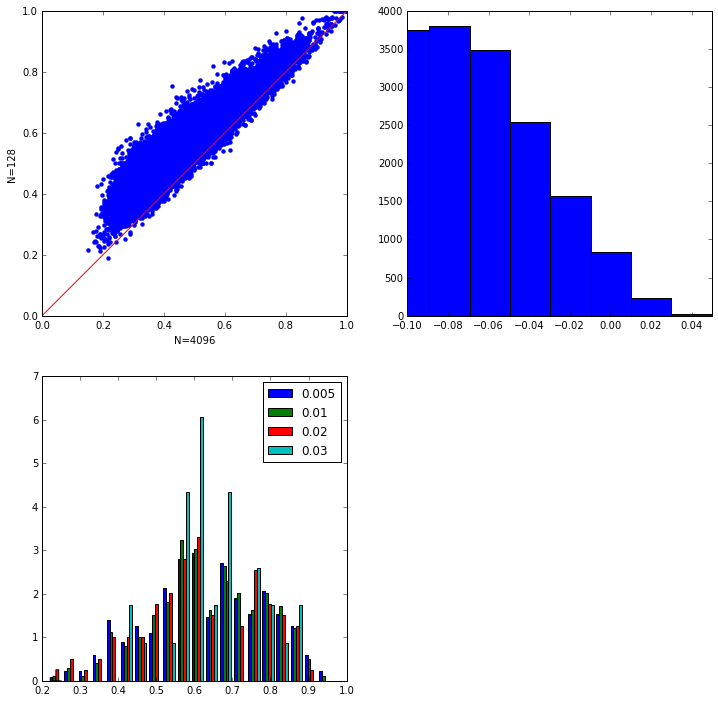

In [29]:
figsize(12,12)
subplot(2,2,1)
scatter(sims[4096],sims[128],lw=0)
_=plot([0,1],[0,1],color='r')
_=xlabel('N=4096')
_=ylabel('N=128')
_=xlim((0,1))
_=ylim((0,1))

subplot(2,2,2)
diffs=np.array(sims[4096])-np.array(sims[128])
_=hist(diffs,bins=20)
_=xlim((-.1,.05))

print("fraction >0: ",sum(diffs>0)/len(diffs))
subplot(2,2,3)
tsims = []
bins = (0.005,0.01,0.02,0.03,)
for thresh in bins:
    tsims.append([sims[4096][x] for x in range(len(diffs)) if diffs[x]>thresh])
    print("fraction >%.3f: "%thresh,sum(diffs>thresh)/len(diffs))
    
_=hist(tsims,bins=20,normed=1,label=[str(x) for x in bins])
_=legend()
_=xlim((0.2,1.0))

fraction >0:  0.0054
fraction >0.005:  0.00436
fraction >0.010:  0.00308
fraction >0.020:  0.00188
fraction >0.030:  0.001


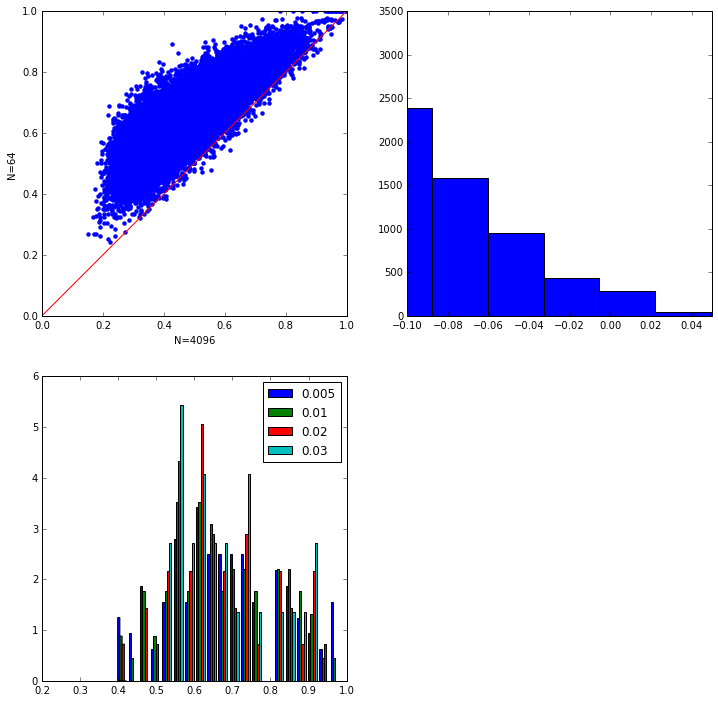

In [30]:
figsize(12,12)
subplot(2,2,1)
scatter(sims[4096],sims[64],lw=0)
_=plot([0,1],[0,1],color='r')
_=xlabel('N=4096')
_=ylabel('N=64')
_=xlim((0,1))
_=ylim((0,1))

subplot(2,2,2)
diffs=np.array(sims[4096])-np.array(sims[64])
_=hist(diffs,bins=20)
_=xlim((-.1,.05))

print("fraction >0: ",sum(diffs>0)/len(diffs))
subplot(2,2,3)
tsims = []
bins = (0.005,0.01,0.02,0.03,)
for thresh in bins:
    tsims.append([sims[4096][x] for x in range(len(diffs)) if diffs[x]>thresh])
    print("fraction >%.3f: "%thresh,sum(diffs>thresh)/len(diffs))
    
_=hist(tsims,bins=20,normed=1,label=[str(x) for x in bins])
_=legend()
_=xlim((0.2,1.0))